***IMPORT NECASSARY LIBRARIES***

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LogisticRegression

***Import the dataset from the vacine prediction dataset file. Assign it to a variable called df***

In [68]:
path='/content/h1n1_vaccine_prediction.csv'
df=pd.read_csv(path)

***Performing basic EDA to understand the structure of the data***

In [69]:
df.shape

(26707, 34)

In [70]:
df.sample(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
18788,18788,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Principle City",3.0,0.0,1
11000,11000,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
10931,10931,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,NaN,Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
25643,25643,3.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9972,9972,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,NaN,Not Married,NaN,Employed,"MSA, Principle City",0.0,0.0,0


In [71]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [72]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [73]:
df.describe(include='all')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


In [74]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

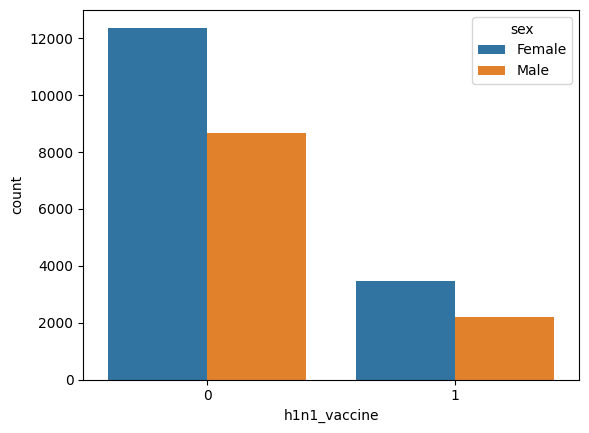

In [75]:
import seaborn as sns
sns.countplot(x="h1n1_vaccine",hue="sex",data=df)

Females are more vaccinated than male

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

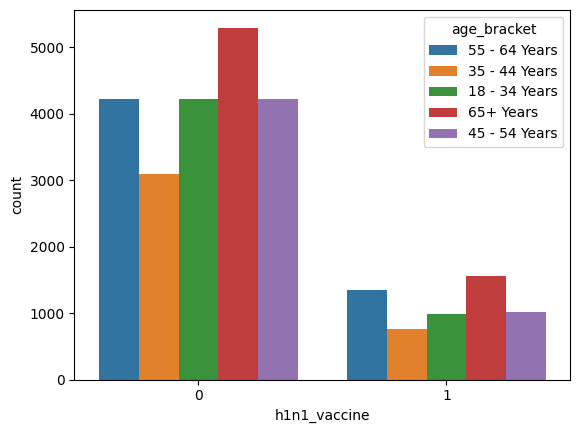

In [76]:
sns.countplot(x="h1n1_vaccine",hue="age_bracket",data=df)

people of the age group 65 are vaccinated more.

array([[<Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>,
        <Axes: title={'center': 'bought_face_mask'}>],
       [<Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>,
        <Axes: title={'center': 'dr_recc_h1n1_vacc'}>],
       [<Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>,
        <Axes: title={'center': 'has_health_insur'}>],
       [<Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_risky'}>,
        <Axes: title={'center': 'sick_f

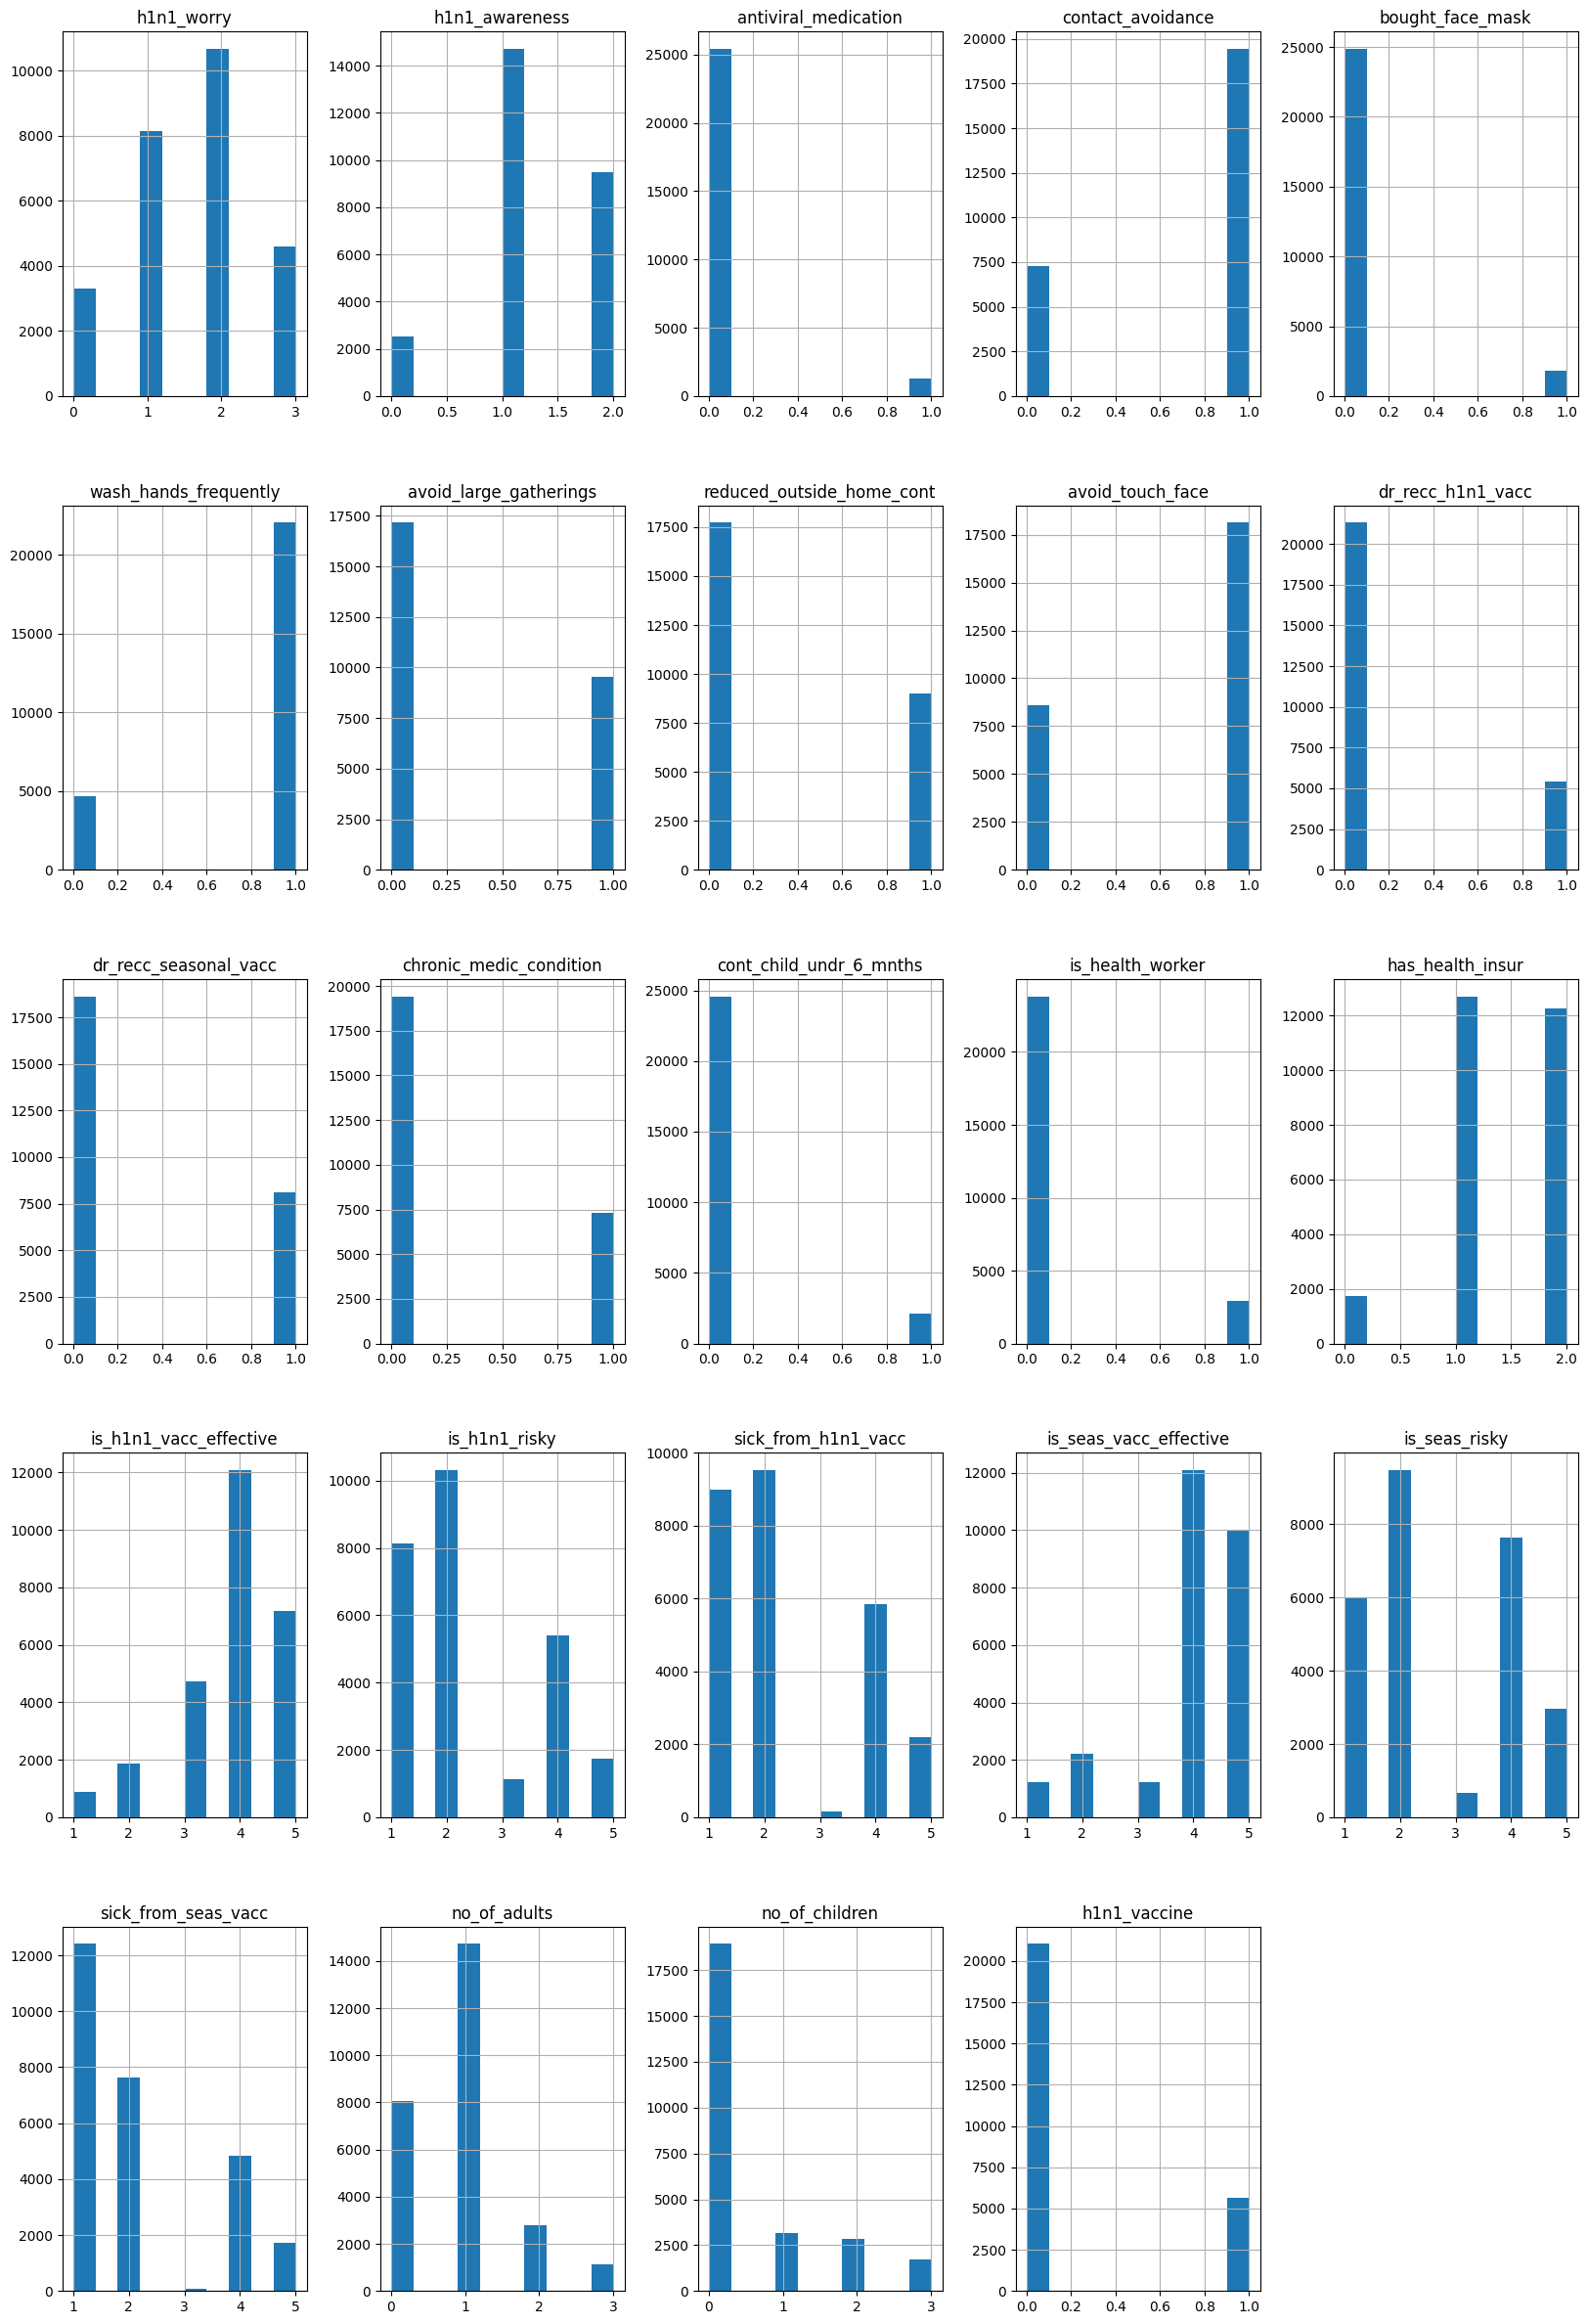

In [ ]:
df.hist(figsize=(20,30))

***Check and handle the missing values, if any.***

In [77]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

there are many missing values.we have to drop some unwanted columns and replace numerical attibute either by mean or median,replace object by mode.

In [78]:
df.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

In [79]:
df.drop(['unique_id'],inplace=True,axis=1)

<Axes: xlabel='h1n1_vaccine', ylabel='count'>

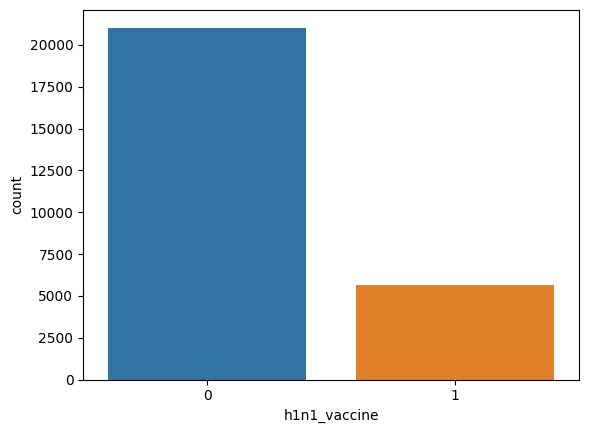

In [ ]:
sns.countplot(x="h1n1_vaccine",data=df)

less than 5000 people are vaccinated.

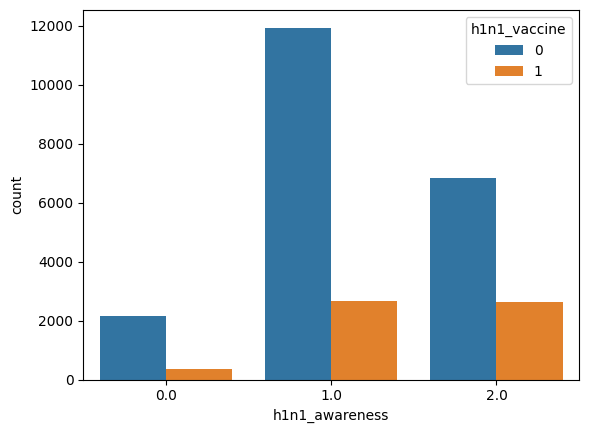

In [80]:
sns.countplot(x = 'h1n1_awareness', data = df, hue = 'h1n1_vaccine')
plt.show()


In [81]:
# Filling 92 missing values by mode
df['h1n1_worry'].fillna(df['h1n1_worry'].mode()[0], inplace = True)

In [82]:
# Filling 192 missing values by mode
df['h1n1_awareness'].fillna(df['h1n1_awareness'].mode()[0], inplace = True)

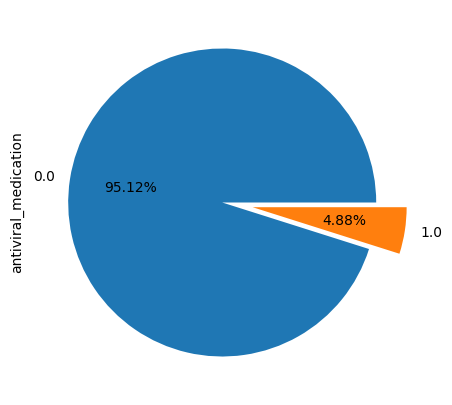

In [83]:
df['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [84]:
# missing 71 missing values by mode
df['antiviral_medication'].fillna(df['antiviral_medication'].mode()[0], inplace = True)

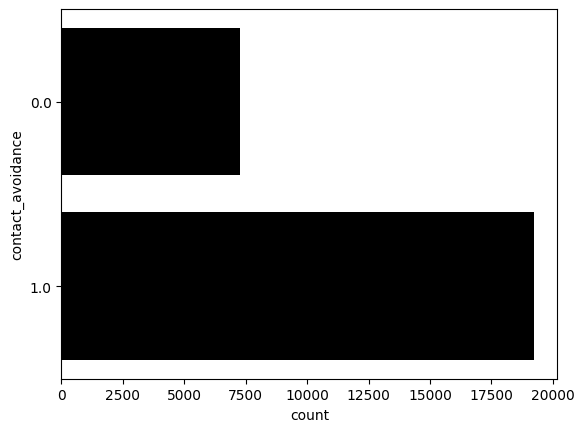

In [85]:
sns.countplot(y = 'contact_avoidance', data = df, color = 'black')
plt.show()

In [86]:
# filling 208 missing values by mode
df['contact_avoidance'].fillna(df['contact_avoidance'].mode()[0], inplace = True)

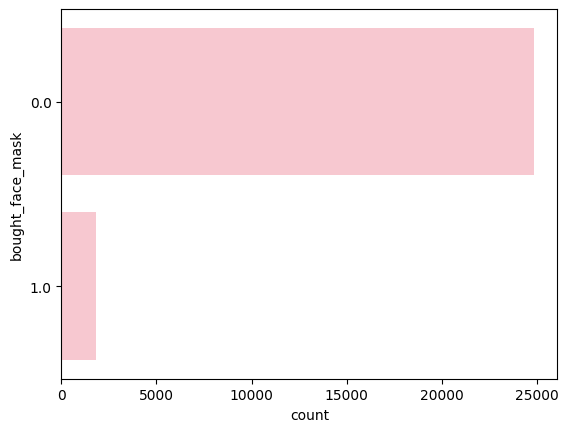

In [87]:
sns.countplot(y = 'bought_face_mask', data = df, color = 'pink')
plt.show()

In [88]:
# filling 19 missing values by mode
df['bought_face_mask'].fillna(df['bought_face_mask'].mode()[0], inplace = True)


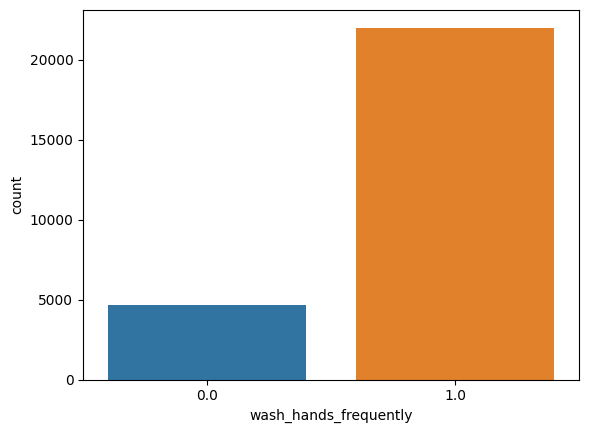

In [89]:
sns.countplot(x = 'wash_hands_frequently', data = df)
plt.show()

In [90]:
# filling 42 missing values by mode
df['wash_hands_frequently'].fillna(df['wash_hands_frequently'].mode()[0], inplace = True)

In [91]:
# filling 87 missing values by mode
df['avoid_large_gatherings'].fillna(df['avoid_large_gatherings'].mode()[0], inplace = True)

In [92]:
# filling 82 missing values by mode
df['reduced_outside_home_cont'].fillna(df['reduced_outside_home_cont'].mode()[0], inplace = True)

In [93]:
# filling 128 missing values by mode
df['avoid_touch_face'].fillna(df['avoid_touch_face'].mode()[0], inplace = True)

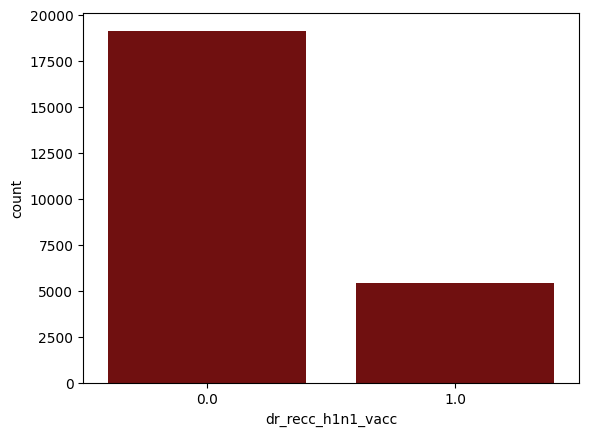

In [94]:
sns.countplot(x = 'dr_recc_h1n1_vacc', data = df, color = 'maroon')
plt.show()

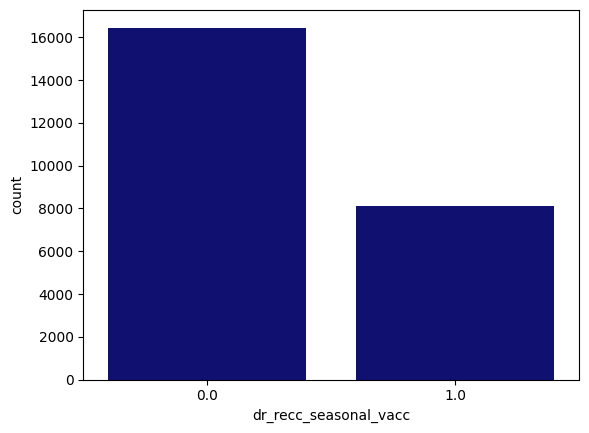

In [95]:
sns.countplot(x = 'dr_recc_seasonal_vacc', data = df, color = 'navy')
plt.show()

In [96]:
# filling 2160 missing values by mode
df['dr_recc_h1n1_vacc'].fillna(df['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
df['dr_recc_seasonal_vacc'].fillna(df['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [97]:
# filling 971 missing values by mode
df['chronic_medic_condition'].fillna(df['chronic_medic_condition'].mode()[0], inplace = True)

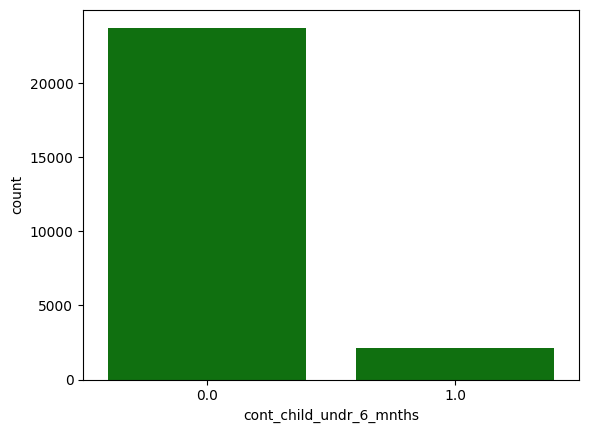

In [98]:
sns.countplot(x = 'cont_child_undr_6_mnths', data = df, color = 'green')
plt.show()

In [99]:
# filling 820 missing values by mode
df['cont_child_undr_6_mnths'].fillna(df['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [100]:
df['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [101]:
# filling 804 missing values by mode
df['is_health_worker'].fillna(df['is_health_worker'].mode()[0], inplace = True)

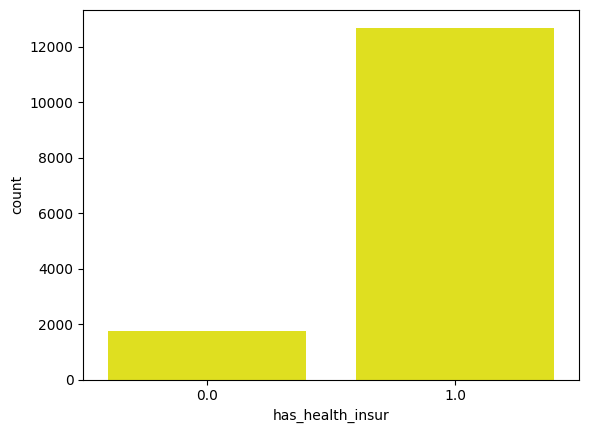

In [102]:
sns.countplot(x = 'has_health_insur', data = df, color = 'yellow')
plt.show()

In [103]:
df['has_health_insur'].fillna(2.0, inplace = True)

In [104]:
# filling 391 and 462 missing values respectively by mode
df['is_h1n1_vacc_effective'].fillna(df['is_h1n1_vacc_effective'].mode()[0], inplace = True)
df['is_seas_vacc_effective'].fillna(df['is_seas_vacc_effective'].mode()[0], inplace = True)

In [105]:
# filling 388 and 514 missing values respectively by mode
df['is_h1n1_risky'].fillna(df['is_h1n1_risky'].mode()[0], inplace = True)
df['is_seas_risky'].fillna(df['is_seas_risky'].mode()[0], inplace = True)

In [106]:
# filling 395 and 537 missing values respectively by mode
df['sick_from_h1n1_vacc'].fillna(df['sick_from_h1n1_vacc'].mode()[0], inplace = True)
df['sick_from_seas_vacc'].fillna(df['sick_from_seas_vacc'].mode()[0], inplace = True)

In [107]:
df['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [108]:
# filling 1407 missing values by mode
df['qualification'].fillna(df['qualification'].mode()[0], inplace = True)

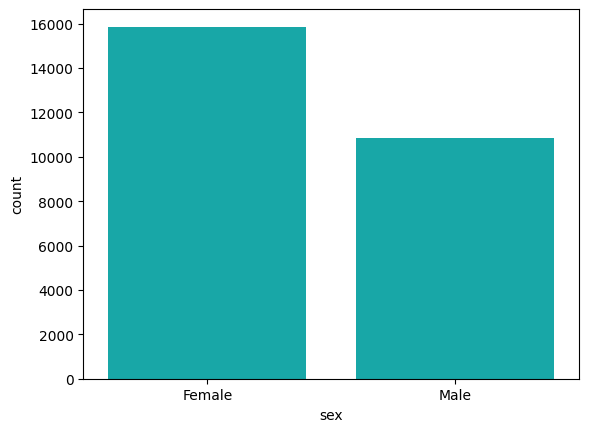

In [109]:
sns.countplot(x = 'sex', data = df, color = 'c')
plt.show()

In [110]:
# no of missing values is 4423, better to create a new category as 'Unknown' as this will not skew the data and info will not be lost
df['income_level'].fillna('Unknown', inplace = True)

In [111]:
df['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [112]:
# filling 1408 missing values by mode
df['marital_status'].fillna(df['marital_status'].mode()[0], inplace = True)

<Axes: >

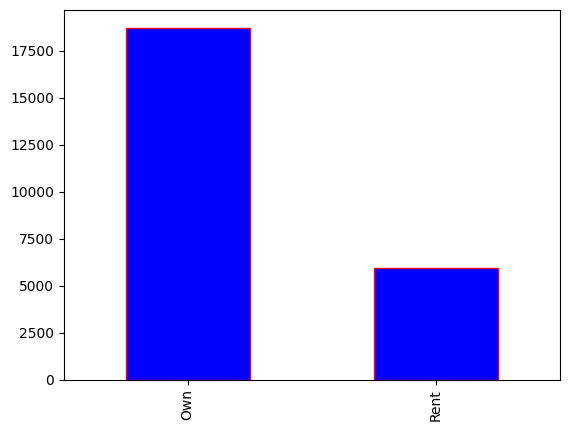

In [113]:
df['housing_status'].value_counts().plot(kind = 'bar', color = 'b', edgecolor = 'r')

In [114]:
# filling 2402 missing values by mode
df['housing_status'].fillna(df['housing_status'].mode()[0], inplace = True)

<Axes: ylabel='employment'>

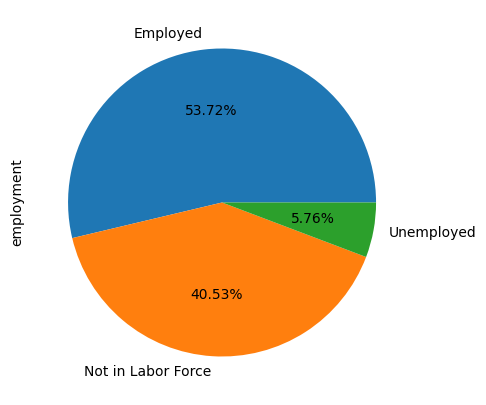

In [115]:
df['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

In [116]:
# filling 1463 missing values by mode
df['employment'].fillna(df['employment'].mode()[0], inplace = True)

In [117]:
display(df['no_of_adults'].unique(), df['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

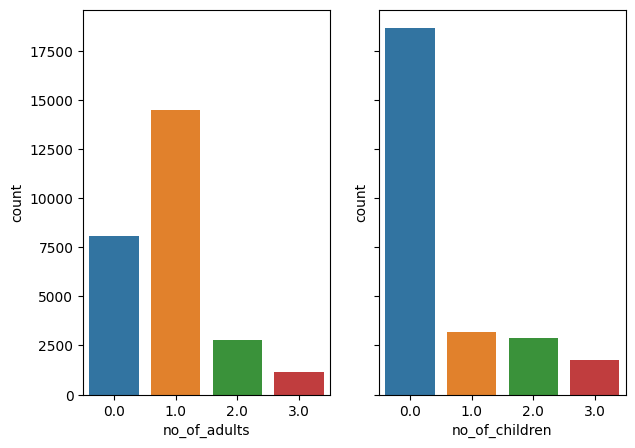

In [118]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = df, ax = ax[0])
sns.countplot( x = 'no_of_children', data = df, ax = ax[1])
plt.show()

In [119]:
# filling 249 nan values by mode
df['no_of_adults'].fillna(df['no_of_adults'].mode()[0], inplace = True)
df['no_of_children'].fillna(df['no_of_children'].mode()[0], inplace = True)

In [120]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [121]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [122]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [126]:
vaccine = df.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
'h1n1_vaccine' : str})


In [129]:
vaccine.dtypes.value_counts()


object    33
dtype: int64

In [130]:
vaccine1= pd.get_dummies(vaccine, drop_first= True )

In [132]:
vaccine1.shape

(26707, 70)

In [133]:
vaccine1['h1n1_vaccine_1'].value_counts(normalize = True)


0    0.787546
1    0.212454
Name: h1n1_vaccine_1, dtype: float64

In [143]:
vaccine1.sample(5)

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,h1n1_vaccine_1
7663,0,1,0,1,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
19768,0,1,0,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
16808,1,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
26259,0,1,0,1,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,1,0
3259,1,0,0,1,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0,0,0


In [137]:
vaccine1.isnull().sum()

h1n1_worry_1.0        0
h1n1_worry_2.0        0
h1n1_worry_3.0        0
h1n1_awareness_1.0    0
h1n1_awareness_2.0    0
                     ..
no_of_adults_3.0      0
no_of_children_1.0    0
no_of_children_2.0    0
no_of_children_3.0    0
h1n1_vaccine_1        0
Length: 70, dtype: int64

there is no missing values here.

In [138]:
vaccine1.dtypes

h1n1_worry_1.0        uint8
h1n1_worry_2.0        uint8
h1n1_worry_3.0        uint8
h1n1_awareness_1.0    uint8
h1n1_awareness_2.0    uint8
                      ...  
no_of_adults_3.0      uint8
no_of_children_1.0    uint8
no_of_children_2.0    uint8
no_of_children_3.0    uint8
h1n1_vaccine_1        uint8
Length: 70, dtype: object

***split the data to build logistic model***

In [145]:
### split x and y
X=vaccine1.drop("h1n1_vaccine_1",axis=1)
Y=vaccine1["h1n1_vaccine_1"]

In [146]:
### training and testing split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [147]:
model_1=LogisticRegression()

In [148]:
model_1.fit(X_train,Y_train)

LogisticRegression()

In [149]:
model_1.score(X_train,Y_train)

0.8523590456831068

In [150]:
logistic_accuracy=model_1.score(X_test,Y_test)
model_1.score(X_test,Y_test)

0.8527392986397104

In [151]:
model=LogisticRegression(solver="lbfgs")
model.fit(X_train,Y_train)
model

LogisticRegression()

In [152]:
predictions=model.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.8527392986397104

In [154]:
from sklearn import metrics

In [155]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6330
           1       0.72      0.49      0.58      1683

    accuracy                           0.85      8013
   macro avg       0.80      0.72      0.75      8013
weighted avg       0.84      0.85      0.84      8013



In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,predictions)

array([[6009,  321],
       [ 859,  824]])

<Axes: >

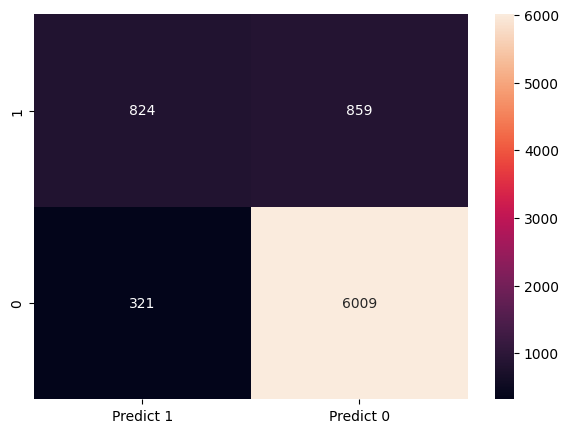

In [157]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                  columns=[i for i in["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

***for DecisionTreeClassifier***

In [158]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier(max_depth=3)
###over fit means good with train and bad with test data

In [159]:
model_2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [160]:
model_2.score(X_train,Y_train)

0.8212795549374131

In [161]:
decision_tree_accuracy=model_2.score(X_test,Y_test)
model_2.score(X_test,Y_test)

0.8249095220267066

*** for BaggingClassifier***

In [162]:
from sklearn.ensemble import BaggingClassifier
model_3=BaggingClassifier(n_estimators=90,base_estimator=model_2)

In [163]:
model_3.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=90)

In [164]:
model_3.score(X_train,Y_train)

0.8228843479191185

In [165]:
bagging_accuracy=model_3.score(X_test,Y_test)
model_3.score(X_test,Y_test)

0.8270310745039311

***for AdaBoostClassifier***

In [166]:
from sklearn.ensemble import AdaBoostClassifier
model_4=AdaBoostClassifier(n_estimators=27)
model_4.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=27)

In [167]:
model_4.score(X_train,Y_train)

0.8484005563282336

In [168]:
model_4.score(X_test,Y_test)

0.8504929489579434

*** for GradientBoostingClassifier***

In [169]:
from sklearn.ensemble import GradientBoostingClassifier
model_5=GradientBoostingClassifier(n_estimators=30)
model_5.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=30)

In [170]:
model_5.score(X_train,Y_train)

0.845511928961164

In [171]:
boosting_accuracy=model_5.score(X_test,Y_test)
model_5.score(X_test,Y_test)

0.8494945713216024

***for RandomForestClassifier***

In [191]:
from sklearn.ensemble import RandomForestClassifier
model_6=RandomForestClassifier(n_estimators=90,max_features=5)
model_6.fit(X_train,Y_train)

RandomForestClassifier(max_features=5, n_estimators=90)

In [192]:
model_6.score(X_train,Y_train)

0.9999465069006098

In [193]:
rf_accuracy=model_6.score(X_test,Y_test)
model_6.score(X_test,Y_test)

0.8504929489579434

In [175]:
from sklearn.svm import SVC
model_7=SVC(kernel='rbf')
model_7.fit(X_train,Y_train)

SVC()

In [176]:
model_7.score(X_train,Y_train)

0.8816197710495346

In [177]:
model_7.score(X_test,Y_test)

0.8579807812305005

In [178]:
print(f"RandomForest        | {rf_accuracy:.4f}")
print(f"Logistic Regression | {logistic_accuracy:.4f}")
print(f"Decision Tree       | {decision_tree_accuracy:.4f}")
print(f"Bagging             | {bagging_accuracy:.4f}")
print(f"Boosting            | {boosting_accuracy:.4f}")

RandomForest        | 0.8472
Logistic Regression | 0.8527
Decision Tree       | 0.8249
Bagging             | 0.8270
Boosting            | 0.8495
